In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import average_precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix

In [157]:
fileName = 'games.csv'

def firstAnalysis(fileName):
    df = pd.read_csv(fileName)
    print('*************************************************************************')
    print('*************************************************************************')
    print(df.dtypes); print(); print('*************************************************************************')
    n,m = df.shape
    print(n,m); print('*************************************************************************')
    print(df.isna().sum()); print(); print('*************************************************************************')
    print('*************************************************************************')
    return(df)

df = firstAnalysis(fileName)
df.head()

*************************************************************************
*************************************************************************
id                 object
rated                bool
created_at        float64
last_move_at      float64
turns               int64
victory_status     object
winner             object
increment_code     object
white_id           object
white_rating        int64
black_id           object
black_rating        int64
moves              object
opening_eco        object
opening_name       object
opening_ply         int64
dtype: object

*************************************************************************
20058 16
*************************************************************************
id                0
rated             0
created_at        0
last_move_at      0
turns             0
victory_status    0
winner            0
increment_code    0
white_id          0
white_rating      0
black_id          0
black_rating      0
moves             0
open

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply
0,TZJHLljE,False,1.504210e+12,1.504210e+12,13,outoftime,white,15+2,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,Slav Defense: Exchange Variation,5
1,l1NXvwaE,True,1.504130e+12,1.504130e+12,16,resign,black,5+10,a-00,1322,skinnerua,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,Nimzowitsch Defense: Kennedy Variation,4
2,mIICvQHh,True,1.504130e+12,1.504130e+12,61,mate,white,5+10,ischia,1496,a-00,1500,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,C20,King's Pawn Game: Leonardis Variation,3
3,kWKvrqYL,True,1.504110e+12,1.504110e+12,61,mate,white,20+0,daniamurashov,1439,adivanov2009,1454,d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...,D02,Queen's Pawn Game: Zukertort Variation,3
4,9tXo1AUZ,True,1.504030e+12,1.504030e+12,95,mate,white,30+3,nik221107,1523,adivanov2009,1469,e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...,C41,Philidor Defense,5


In [158]:
df['opening_eco'].unique()

array(['D10', 'B00', 'C20', 'D02', 'C41', 'B27', 'D00', 'C50', 'B01',
       'A00', 'C02', 'C00', 'C57', 'C55', 'A40', 'B20', 'A25', 'B21',
       'D01', 'C45', 'D06', 'B52', 'D20', 'B06', 'A45', 'B77', 'A21',
       'B70', 'B23', 'B76', 'C21', 'A80', 'A20', 'A04', 'C26', 'C44',
       'E10', 'A41', 'C01', 'A10', 'C18', 'A47', 'C10', 'D80', 'D30',
       'D41', 'A46', 'D31', 'C64', 'C24', 'A43', 'A08', 'B03', 'B29',
       'B02', 'B13', 'B57', 'E20', 'E11', 'C40', 'C11', 'C28', 'B30',
       'A56', 'C65', 'B90', 'B50', 'B51', 'E00', 'C70', 'B11', 'B22',
       'B40', 'B31', 'B18', 'C61', 'C78', 'B10', 'C22', 'C54', 'C68',
       'B12', 'C77', 'A42', 'C42', 'D07', 'B32', 'A22', 'C46', 'B07',
       'A06', 'C60', 'A07', 'A02', 'C58', 'A03', 'B54', 'D03', 'C69',
       'A31', 'D46', 'C34', 'C48', 'C47', 'B24', 'C67', 'E61', 'C53',
       'C23', 'B96', 'A05', 'D92', 'A49', 'C37', 'A09', 'A01', 'C88',
       'B34', 'C03', 'C33', 'A48', 'A11', 'A81', 'B05', 'B53', 'B08',
       'C30', 'A15',

In [159]:
df['opening_eco'] = df['opening_eco'].astype(str).str[0:2]
df['opening_eco'].unique()
df['opening_eco'] = pd.Categorical(df['opening_eco'])
df['opening_eco'] = df['opening_eco'].cat.codes
df.head()

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply
0,TZJHLljE,False,1.504210e+12,1.504210e+12,13,outoftime,white,15+2,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,31,Slav Defense: Exchange Variation,5
1,l1NXvwaE,True,1.504130e+12,1.504130e+12,16,resign,black,5+10,a-00,1322,skinnerua,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,10,Nimzowitsch Defense: Kennedy Variation,4
2,mIICvQHh,True,1.504130e+12,1.504130e+12,61,mate,white,5+10,ischia,1496,a-00,1500,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,22,King's Pawn Game: Leonardis Variation,3
3,kWKvrqYL,True,1.504110e+12,1.504110e+12,61,mate,white,20+0,daniamurashov,1439,adivanov2009,1454,d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...,30,Queen's Pawn Game: Zukertort Variation,3
4,9tXo1AUZ,True,1.504030e+12,1.504030e+12,95,mate,white,30+3,nik221107,1523,adivanov2009,1469,e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...,24,Philidor Defense,5


In [160]:
toDrop = ['id','created_at','last_move_at','opening_name','moves','opening_ply','white_id','black_id','victory_status']
df.drop(columns = toDrop, inplace=True)
df = df[['rated','increment_code','white_rating','black_rating','opening_eco','turns','winner']]
df.head()

,rated,increment_code,white_rating,black_rating,opening_eco,turns,winner
0,False,15+2,1500,1191,31,13,white
1,True,5+10,1322,1261,10,16,black
2,True,5+10,1496,1500,22,61,white
3,True,20+0,1439,1454,30,61,white
4,True,30+3,1523,1469,24,95,white


In [161]:
df.head()

,rated,increment_code,white_rating,black_rating,opening_eco,turns,winner
0,False,15+2,1500,1191,31,13,white
1,True,5+10,1322,1261,10,16,black
2,True,5+10,1496,1500,22,61,white
3,True,20+0,1439,1454,30,61,white
4,True,30+3,1523,1469,24,95,white


In [162]:
df.head()

,rated,increment_code,white_rating,black_rating,opening_eco,turns,winner
0,False,15+2,1500,1191,31,13,white
1,True,5+10,1322,1261,10,16,black
2,True,5+10,1496,1500,22,61,white
3,True,20+0,1439,1454,30,61,white
4,True,30+3,1523,1469,24,95,white


In [163]:
df['diff_class'] = df['white_rating']-df['black_rating']

In [164]:
df.head()

,rated,increment_code,white_rating,black_rating,opening_eco,turns,winner,diff_class
0,False,15+2,1500,1191,31,13,white,309
1,True,5+10,1322,1261,10,16,black,61
2,True,5+10,1496,1500,22,61,white,-4
3,True,20+0,1439,1454,30,61,white,-15
4,True,30+3,1523,1469,24,95,white,54


In [165]:
df.head()

,rated,increment_code,white_rating,black_rating,opening_eco,turns,winner,diff_class
0,False,15+2,1500,1191,31,13,white,309
1,True,5+10,1322,1261,10,16,black,61
2,True,5+10,1496,1500,22,61,white,-4
3,True,20+0,1439,1454,30,61,white,-15
4,True,30+3,1523,1469,24,95,white,54


In [166]:
df.head()

,rated,increment_code,white_rating,black_rating,opening_eco,turns,winner,diff_class
0,False,15+2,1500,1191,31,13,white,309
1,True,5+10,1322,1261,10,16,black,61
2,True,5+10,1496,1500,22,61,white,-4
3,True,20+0,1439,1454,30,61,white,-15
4,True,30+3,1523,1469,24,95,white,54


In [167]:
mnw,mxw = df['white_rating'].min(),df['white_rating'].max()
mnb,mxb = df['black_rating'].min(),df['black_rating'].max()
print(mnw)
print(mxw)
print(mnb)
print(mxb)

784
2700
789
2723


In [168]:
df['white_rating'] = pd.cut(df['white_rating'], bins=[600, 800, 1000, 
                    1200, 1400, 1600, 1800, 2000,2200,2400,2500,2700,3000], 
                    include_lowest=True, labels=['A', 'B', 'C', 'D', 'E', 'F','G','H','I','J','K','L'])
df['white_rating'].replace({'A':0,'B':1,'C':2,'D':3,'E':4,'F':5,'G':6,'H':7,'I':8,'J':9,'K':10,'L':11}, inplace = True)

In [169]:
df['black_rating'] = pd.cut(df['black_rating'], bins=[600, 800, 1000, 
                    1200, 1400, 1600, 1800, 2000,2200,2400,2500,2700,3000], 
                    include_lowest=True, labels=['A', 'B', 'C', 'D', 'E', 'F','G','H','I','J','K','L'])
df['black_rating'].replace({'A':0,'B':1,'C':2,'D':3,'E':4,'F':5,'G':6,'H':7,'I':8,'J':9,'K':10,'L':11}, inplace = True)

In [170]:
df.head()

,rated,increment_code,white_rating,black_rating,opening_eco,turns,winner,diff_class
0,False,15+2,4,2,31,13,white,309
1,True,5+10,3,3,10,16,black,61
2,True,5+10,4,4,22,61,white,-4
3,True,20+0,4,4,30,61,white,-15
4,True,30+3,4,4,24,95,white,54


In [171]:
df = df[['rated','increment_code','white_rating','black_rating','diff_class','opening_eco','turns','winner']]
df.head()

,rated,increment_code,white_rating,black_rating,diff_class,opening_eco,turns,winner
0,False,15+2,4,2,309,31,13,white
1,True,5+10,3,3,61,10,16,black
2,True,5+10,4,4,-4,22,61,white
3,True,20+0,4,4,-15,30,61,white
4,True,30+3,4,4,54,24,95,white


In [172]:
df['rated'].replace({False:0,True:1}, inplace = True)

In [173]:
df.head()

,rated,increment_code,white_rating,black_rating,diff_class,opening_eco,turns,winner
0,0,15+2,4,2,309,31,13,white
1,1,5+10,3,3,61,10,16,black
2,1,5+10,4,4,-4,22,61,white
3,1,20+0,4,4,-15,30,61,white
4,1,30+3,4,4,54,24,95,white


In [174]:
df['game_type'] = df['increment_code'].astype(str).str[0:2]
df.head()

,rated,increment_code,white_rating,black_rating,diff_class,opening_eco,turns,winner,game_type
0,0,15+2,4,2,309,31,13,white,15
1,1,5+10,3,3,61,10,16,black,5+
2,1,5+10,4,4,-4,22,61,white,5+
3,1,20+0,4,4,-15,30,61,white,20
4,1,30+3,4,4,54,24,95,white,30


In [175]:
a = df.groupby(['winner','game_type']).size()

In [176]:
df['game_type'].replace({'0+':0 , '1+':1 , '2+':2 ,'3+':3, '4+':4, '5+':5,
                               '6+':6,'7+':7,'8+':8,'9+':9,'10':10,'11':11,'12':12,
                               '13':13,'14':14,'15':15,'16':16,'17':17,'18':18,'19':19,
                               '20':20,'21':21,'25':25,'29':29,'30':30,'35':35,'40':40,'45':45,
                               '60':60,'90':90},inplace=True)

In [177]:
df.head()

,rated,increment_code,white_rating,black_rating,diff_class,opening_eco,turns,winner,game_type
0,0,15+2,4,2,309,31,13,white,15
1,1,5+10,3,3,61,10,16,black,5
2,1,5+10,4,4,-4,22,61,white,5
3,1,20+0,4,4,-15,30,61,white,20
4,1,30+3,4,4,54,24,95,white,30


In [178]:
df['winner'].replace({'black':0 , 'draw':2, 'white':1},inplace=True)

In [179]:
df.head()

,rated,increment_code,white_rating,black_rating,diff_class,opening_eco,turns,winner,game_type
0,0,15+2,4,2,309,31,13,1,15
1,1,5+10,3,3,61,10,16,0,5
2,1,5+10,4,4,-4,22,61,1,5
3,1,20+0,4,4,-15,30,61,1,20
4,1,30+3,4,4,54,24,95,1,30


In [180]:
df['diff'] = df['white_rating'] - df['black_rating']

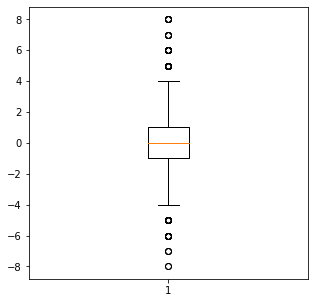

In [181]:
plt.boxplot(df['diff']);

In [182]:
df = df[(df['diff'] >= -4) & (df['diff'] <= 4)]

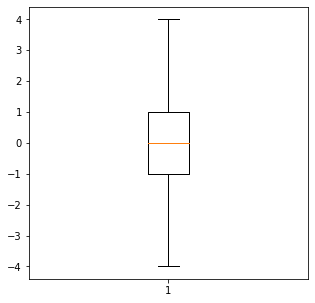

In [183]:
plt.boxplot(df['diff']);

In [184]:
df = df[(df['winner'] != 2)]

In [185]:
print(df.shape)
print(df.groupby(['winner']).size)

(18961, 10)
<bound method GroupBy.size of <pandas.core.groupby.generic.DataFrameGroupBy object at 0x0000022BE7C6ADF0>>


In [186]:
df = df[['rated','game_type','diff','opening_eco','turns','winner']]

In [187]:
df.to_csv('forModelingGames.csv',index=False)

In [188]:
df_chess = pd.read_csv('forModelingGames.csv')

In [189]:
#aa,bb,cc = df_chess.groupby(['winner']).size()
aa,bb = df_chess.groupby(['winner']).size()
print(aa)
print(bb)
#print(cc)

9047
9914


In [190]:
X = df_chess[['rated','game_type','diff','opening_eco','turns']].values
y = df_chess['winner']

In [191]:
#a = df_chess.loc[df_chess['winner'] == 0]
#b = df_chess.loc[df_chess['winner'] == 1]
#c = df_chess.loc[df_chess['winner'] == 2]

#a = a.sample(n = bb)
#b = b.sample(n = bb)
#c = c.sample(n = bb)

#new_chess = np.concatenate([a,b,c],axis=0)
#new_chess = np.concatenate([a,b],axis=0)
#n,m = new_chess.shape
#X = new_chess[:,0:m-1]
#y = new_chess[:,m-1]

In [192]:
# Normalizing X
X = StandardScaler().fit(X).transform(X)

# Setting training and test data from the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, shuffle=True, random_state = 42);
X_train = np.around(X_train, decimals = 5)
X_test = np.around(X_test, decimals = 5)

# We train the binary logistic regression model and fit
clf = LogisticRegression(multi_class = 'multinomial', solver='lbfgs').fit(X, y)
#clf = LogisticRegression(solver='lbfgs').fit(X, y)
    
# Predicted values from X_test
y_hat = clf.predict(X_test)

# Metrics
acc_training = clf.score(X_train,y_train)
acc = accuracy_score(y_test, y_hat)

In [193]:
print('Training accuracy = ', acc_training)
print('Accuracy = ', acc)

Training accuracy =  0.6371967299578059
Accuracy =  0.6245715792248879


In [194]:
cm = confusion_matrix(y_test,y_hat)
cm

array([[ 872,  964],
       [ 460, 1497]], dtype=int64)

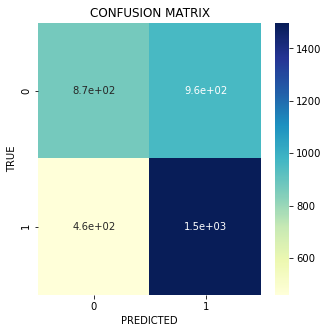

In [195]:
# printing the confusion matrix
plt.rcParams['figure.figsize'] = (5, 5)
sns.heatmap(cm, annot = True, cmap = 'YlGnBu')
plt.title('CONFUSION MATRIX', fontsize = 12)
plt.xlabel('PREDICTED')
plt.ylabel('TRUE')
plt.show()

ROC AUC:  0.680977620140204


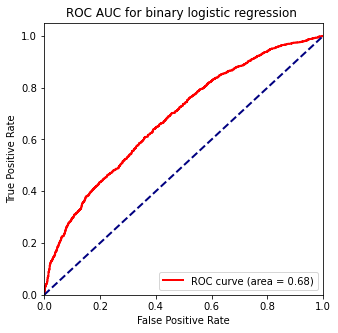

In [196]:
# We will now calculate the ROC AUC and plot it
# Learn to predict each class against the other
y_score = clf.fit(X_train, y_train).decision_function(X_test);

# Compute ROC curve, ROC area and plot it
fpr, tpr, threshold = roc_curve(y_test, y_score);
roc_auc = auc(fpr, tpr);
print('ROC AUC: ', roc_auc)

plt.figure();
lw = 2;
plt.plot(fpr, tpr, color='red',
    lw=lw, label='ROC curve (area = %0.2f)' % roc_auc);
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--');
plt.xlim([0.0, 1.0]);
plt.ylim([0.0, 1.05]);
plt.xlabel('False Positive Rate');
plt.ylabel('True Positive Rate');
plt.title('ROC AUC for binary logistic regression ');
plt.legend(loc="lower right");
plt.show()

In [207]:
threshold

array([ 2.50868443,  1.50868443,  1.50314437, ..., -1.36049875,
       -1.39223753, -1.4362677 ])

In [208]:
a = (threshold != 0) & (threshold >= 0) & (threshold <= 1)

In [209]:
a

array([False, False, False, ..., False, False, False])

In [210]:
print(threshol*a)

[ 0.  0.  0. ... -0. -0. -0.]


In [211]:
print((threshold*a).shape)

(1761,)
